In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import plotly.plotly as py
import plotly.graph_objs as go
import warnings
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import seaborn as sns
import os
import time

#Setting options
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

#Set Default option
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
pd.options.display.max_rows = 3000

In [2]:
energy = pd.read_csv('C:/Users/rishu/Documents/OneDrive/Desktop/ML/energydata_complete.csv')

In [3]:
energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
energy.shape

(19735, 29)

In [5]:
energy.drop(['date'],axis=1,inplace=True)
energy.drop(['T_out','T9','rv2','lights'],axis=1,inplace=True)

# Modeling

### Converting to binary

In [6]:
energy['high'] = pd.cut(energy['Appliances'], bins=[0,100,float('Inf')], labels=['low', 'high'])    
energy.drop(['Appliances'],axis=1,inplace = True)

In [7]:
energy['high'].value_counts()

low     15502
high     4233
Name: high, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [10]:
#Train-Test split 70:30
X_train, X_test, y_train, y_test = train_test_split(energy.iloc[:,:-1], energy['high'],
                                                test_size=0.25)

In [11]:
X_train.shape

(14801, 23)

In [12]:
X_test.shape

(4934, 23)

In [13]:
y_train.shape

(14801,)

In [14]:
#scaling the features 
X_train = ss.fit_transform(X_train)

In [15]:
X_test = ss.fit_transform(X_test)

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import sklearn as sk
from sklearn import preprocessing, model_selection, metrics
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold, cross_val_score

# SVM

In [17]:
from sklearn.model_selection import cross_validate

In [18]:
def a(clf,X_train, y_train):
    scores = cross_validate(clf, X_train, y_train,cv=3, return_train_score=True)
    return scores

## Linear Kernel Function vaaries of C ( Margin Parameter)
clf = svm.SVC(kernel='linear', C=0.1)
score1=a(clf,X_train,y_train)
clf = svm.SVC(kernel='linear', C=1)
score2=a(clf,X_train,y_train)
clf = svm.SVC(kernel='linear', C=10)
score3=a(clf,X_train,y_train)
clf = svm.SVC(kernel='linear', C=100)
score4=a(clf,X_train,y_train)

In [19]:
print(score1)
print(score2)
print(score3)
print(score4)

{'fit_time': array([5.15753412, 4.42960644, 4.86180663]), 'score_time': array([0.67351723, 0.77196431, 0.73467278]), 'test_score': array([0.78678557, 0.79590596, 0.78816136]), 'train_score': array([0.78635857, 0.80531063, 0.78830563])}
{'fit_time': array([10.1250329 ,  7.76617932,  9.2685709 ]), 'score_time': array([0.74601269, 0.64367533, 0.68781185]), 'test_score': array([0.78759627, 0.80299959, 0.79505372]), 'train_score': array([0.78767609, 0.81037803, 0.79266315])}
{'fit_time': array([46.38439417, 30.86170864, 36.16346908]), 'score_time': array([0.63635468, 0.78689885, 0.70116568]), 'test_score': array([0.7882043 , 0.80360762, 0.79505372]), 'train_score': array([0.7874734 , 0.81108746, 0.79327118])}
{'fit_time': array([464.15739155, 205.88349271, 538.78150392]), 'score_time': array([0.69010234, 0.79288054, 0.7659719 ]), 'test_score': array([0.78962302, 0.80340495, 0.79525644]), 'train_score': array([0.78970305, 0.81108746, 0.79327118])}


In [20]:
s1=pd.DataFrame.from_dict(score1)
s2=pd.DataFrame.from_dict(score2)
s3=pd.DataFrame.from_dict(score3)
s4=pd.DataFrame.from_dict(score4)

In [21]:
## Train and Test Accuracy for Linear SVM Kernel function
s1_linear_test=[s1[['test_score']].mean(axis=0),s2[['test_score']].mean(axis=0),s3[['test_score']].mean(axis=0),s4[['test_score']].mean(axis=0)]
s1_linear_train=[s1[['train_score']].mean(axis=0),s2[['train_score']].mean(axis=0),s3[['train_score']].mean(axis=0),s4[['train_score']].mean(axis=0)]
c=[0.1,1,10,100]

Text(0.5, 1.0, 'Train and CrossValidation accuracy for SVM_Linear kernel as a function of C')

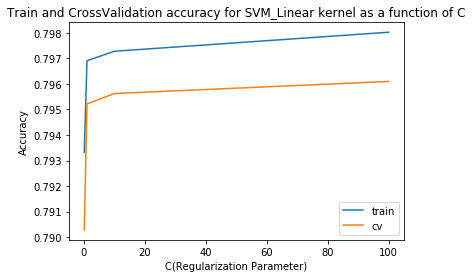

In [22]:
## Learning curve for Train and Test accuracy for Linear SVM function for various values of C
plt.plot(c,s1_linear_train,label='train')
plt.plot(c,s1_linear_test,label='cv')
plt.xlabel("C(Regularization Parameter)")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.title("Train and CrossValidation accuracy for SVM_Linear kernel as a function of C")

In [23]:
clf = svm.SVC(kernel='rbf', C=0.1)
score5=a(clf,X_train,y_train)
clf = svm.SVC(kernel='rbf', C=1)
score6=a(clf,X_train,y_train)

In [24]:
print(score5)
print(score6)

{'fit_time': array([5.14720225, 4.81709409, 5.50826836]), 'score_time': array([1.38230395, 1.3613565 , 1.29553246]), 'test_score': array([0.78577219, 0.7873936 , 0.78775593]), 'train_score': array([0.78645992, 0.78899362, 0.7873936 ])}
{'fit_time': array([4.54584193, 5.09736466, 5.15820336]), 'score_time': array([1.26162481, 1.31452751, 1.32750225]), 'test_score': array([0.84029185, 0.83481962, 0.83012366]), 'train_score': array([0.8458498 , 0.85061315, 0.84920957])}


In [25]:
s5=pd.DataFrame.from_dict(score5)
s6=pd.DataFrame.from_dict(score6)

In [26]:
## Train and Test Accuracy for rbf SVM Kernel function
s1_rbf_test=[s5[['test_score']].mean(axis=0),s6[['test_score']].mean(axis=0)]
s1_rbf_train=[s5[['train_score']].mean(axis=0),s6[['train_score']].mean(axis=0)]
C=[0.1,1]

Text(0.5, 1.0, 'Train and CrossValidation accuracy for SVM_rbf kernel as a function of C')

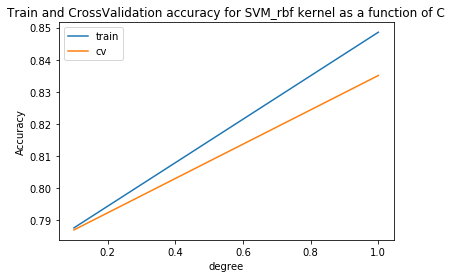

In [27]:
plt.plot(C,s1_rbf_train,label='train')
plt.plot(C,s1_rbf_test,label='cv')
plt.xlabel("degree")
plt.ylabel("Accuracy")
plt.legend(loc='upper left')
plt.title("Train and CrossValidation accuracy for SVM_rbf kernel as a function of C")

In [28]:
## Support Vector Machine with Sigmoid function
clf = svm.SVC(kernel='sigmoid', C=0.1)
score8=a(clf,X_train,y_train)
clf = svm.SVC(kernel='sigmoid', C=1)
score9=a(clf,X_train,y_train)
clf = svm.SVC(kernel='sigmoid', C=10)
score10=a(clf,X_train,y_train)
clf = svm.SVC(kernel='sigmoid', C=100)
score11=a(clf,X_train,y_train)

In [29]:
print(score8)
print(score9)
print(score10)
print(score11)

{'fit_time': array([4.7742312 , 6.55314946, 7.41616273]), 'score_time': array([1.23016   , 1.38813448, 1.43217111]), 'test_score': array([0.71199838, 0.7249696 , 0.71173728]), 'train_score': array([0.71906355, 0.72027972, 0.69933117])}
{'fit_time': array([3.94045806, 5.6040051 , 6.72401524]), 'score_time': array([1.32652521, 1.32645249, 1.3334341 ]), 'test_score': array([0.68463721, 0.70044589, 0.70220961]), 'train_score': array([0.69261174, 0.69301713, 0.6913255 ])}
{'fit_time': array([4.23566842, 5.54317498, 6.54049993]), 'score_time': array([1.3144846 , 1.30749989, 1.30550885]), 'test_score': array([0.68179976, 0.69578435, 0.70139874]), 'train_score': array([0.69048343, 0.69068613, 0.68858938])}
{'fit_time': array([3.68115187, 5.58505583, 5.83239865]), 'score_time': array([1.28057742, 1.30850434, 1.30954957]), 'test_score': array([0.68098906, 0.69558168, 0.68801946]), 'train_score': array([0.69028073, 0.69028073, 0.68899473])}


In [30]:
s8=pd.DataFrame.from_dict(score8)
s9=pd.DataFrame.from_dict(score9)
s10=pd.DataFrame.from_dict(score10)
s11=pd.DataFrame.from_dict(score11)

In [31]:
## Train and Test accuracy for sigmoid Kernel function 
s1_sig_test=[s8[['test_score']].mean(axis=0),s9[['test_score']].mean(axis=0),s10[['test_score']].mean(axis=0),s11[['test_score']].mean(axis=0)]
s1_sig_train=[s8[['train_score']].mean(axis=0),s9[['train_score']].mean(axis=0),s10[['train_score']].mean(axis=0),s11[['train_score']].mean(axis=0)]
C=[0.1,1,10,100]

Text(0.5, 1.0, 'Train and CrossValidation accuracy for SVM_sigmoid kernel as a function of C')

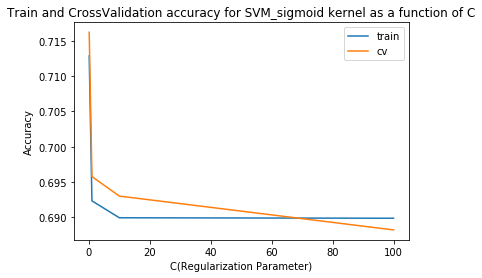

In [32]:
plt.plot(C,s1_sig_train,label='train')
plt.plot(C,s1_sig_test,label='cv')
plt.xlabel("C(Regularization Parameter)")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title("Train and CrossValidation accuracy for SVM_sigmoid kernel as a function of C")

In [33]:
#### Fitting the functions on the complete training set with best parameters
## SVM Functions 
clf1 = svm.SVC(kernel='linear', C=10)
clf1.fit(X_train,y_train)

clf2 = svm.SVC(kernel='rbf', C=1)
clf2.fit(X_train,y_train)

clf3 = svm.SVC(kernel='sigmoid', C=0.1)
clf3.fit(X_train,y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [34]:
y_pred1=clf1.predict(X_test)
y_pred2=clf2.predict(X_test)
y_pred3=clf3.predict(X_test)

In [35]:
## for SVM-Linear
print(confusion_matrix(y_test,y_pred1))  
print(classification_report(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))

[[  81  966]
 [  29 3858]]
              precision    recall  f1-score   support

        high       0.74      0.08      0.14      1047
         low       0.80      0.99      0.89      3887

    accuracy                           0.80      4934
   macro avg       0.77      0.53      0.51      4934
weighted avg       0.79      0.80      0.73      4934

0.7983380624239967


In [36]:
#Applying K-fold cross validation with 10 splits for model trained with clf1
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10)
score=cross_val_score(clf1,X = X_train, y = y_train, cv=kfold)
print('Cross-validation score:{}\n'.format(score))
print('Average Cross-validation score:{}\n'.format(score.mean()))

Cross-validation score:[0.78325456 0.79391892 0.79391892 0.78040541 0.80810811 0.78851351
 0.80337838 0.79527027 0.79256757 0.81351351]

Average Cross-validation score:0.7952849152325857



In [37]:
## for SVM-rbf
print(confusion_matrix(y_test,y_pred2))  
print(classification_report(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))

[[ 406  641]
 [ 125 3762]]
              precision    recall  f1-score   support

        high       0.76      0.39      0.51      1047
         low       0.85      0.97      0.91      3887

    accuracy                           0.84      4934
   macro avg       0.81      0.68      0.71      4934
weighted avg       0.84      0.84      0.82      4934

0.8447507093635995


In [38]:
#Applying K-fold cross validation with 10 splits for model trained with clf2
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10)
score=cross_val_score(clf2,X = X_train, y = y_train, cv=kfold)
print('Cross-validation score:{}\n'.format(score))
print('Average Cross-validation score:{}\n'.format(score.mean()))

Cross-validation score:[0.83524646 0.85       0.84256757 0.83581081 0.8472973  0.84189189
 0.84256757 0.84324324 0.83175676 0.83716216]

Average Cross-validation score:0.8407543752395205



In [39]:
## for SVM Sigmoid
print(confusion_matrix(y_test,y_pred3))  
print(classification_report(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))

[[ 277  770]
 [ 616 3271]]
              precision    recall  f1-score   support

        high       0.31      0.26      0.29      1047
         low       0.81      0.84      0.83      3887

    accuracy                           0.72      4934
   macro avg       0.56      0.55      0.56      4934
weighted avg       0.70      0.72      0.71      4934

0.7190920145926226


In [40]:
#Applying K-fold cross validation with 10 splits for model trained with clf3
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10)
score=cross_val_score(clf3,X = X_train, y = y_train, cv=kfold)
print('Cross-validation score:{}\n'.format(score))
print('Average Cross-validation score:{}\n'.format(score.mean()))

Cross-validation score:[0.701553   0.71486486 0.71283784 0.68918919 0.73040541 0.70540541
 0.72162162 0.72432432 0.71013514 0.71283784]

Average Cross-validation score:0.7123174626348158



# Decision Tree

In [41]:
#Decision Tree
def dec_tree(X_train, y_train, depth): 
    tree = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=depth) 
    tree.fit(X_train, y_train)
    return tree

In [42]:
def pred(X_test, tree_object):
    y_pred = tree_object.predict(X_test)  
    return y_pred

def cal_accuracy(y_test, y_pred):
    print("Confusion Matrix: ",confusion_matrix(y_test, y_pred)) 
    print ("Accuracy Score: ", accuracy_score(y_test,y_pred)*100) 
    print("Classsification Report: ", classification_report(y_test, y_pred))

In [43]:
tree = DecisionTreeClassifier(criterion = "gini", random_state = 100)
tree.fit(X_train, y_train) 
y_pred = pred(X_test, tree)
cal_accuracy(y_test, y_pred)

Confusion Matrix:  [[ 710  337]
 [ 312 3575]]
Accuracy Score:  86.84637211187678
Classsification Report:                precision    recall  f1-score   support

        high       0.69      0.68      0.69      1047
         low       0.91      0.92      0.92      3887

    accuracy                           0.87      4934
   macro avg       0.80      0.80      0.80      4934
weighted avg       0.87      0.87      0.87      4934



In [44]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.868


In [45]:
print(tree.tree_.max_depth)

26


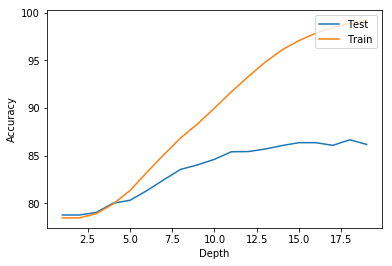

In [46]:
test_acc = []
train_acc = []
depth = []
for i in range(1,20):
    tree = dec_tree(X_train, y_train, i)
    y_pred_test = pred(X_test, tree)
    y_pred_train = pred(X_train, tree)
    test_acc.append(accuracy_score(y_test,y_pred_test)*100)
    train_acc.append(accuracy_score(y_train,y_pred_train)*100)
    depth.append(i)
    
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.plot(depth,test_acc, label='Test')
plt.plot(depth,train_acc,label='Train')
plt.legend(loc='upper right')
plt.show()

In [68]:
#let's try max_depth=10

tree_4 = DecisionTreeClassifier(criterion='gini',max_depth=10, random_state=42)
tree_4.fit(X_test, y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [69]:
pred_4 = tree_4.predict(X_test)

In [70]:
print(classification_report(y_test,pred_4))
print(confusion_matrix(y_test,pred_4))

              precision    recall  f1-score   support

        high       0.87      0.63      0.73      1047
         low       0.91      0.98      0.94      3887

    accuracy                           0.90      4934
   macro avg       0.89      0.80      0.84      4934
weighted avg       0.90      0.90      0.90      4934

[[ 664  383]
 [  96 3791]]


In [50]:
print("Accuracy on training set: {:.3f}".format(tree_4.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree_4.score(X_test, y_test)))

Accuracy on training set: 0.813
Accuracy on test set: 0.903


In [51]:
#Applying K-fold cross validation with 10 splits for model trained with max_depth=4
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10)
score=cross_val_score(tree_4,X = X_train, y = y_train, cv=kfold)
print('Cross-validation score:{}\n'.format(score))
print('Average Cross-validation score:{}\n'.format(score.mean()))

Cross-validation score:[0.83592167 0.85       0.85472973 0.83040541 0.8277027  0.83851351
 0.86148649 0.85743243 0.84594595 0.85337838]

Average Cross-validation score:0.8455516269138821



# Boosting

In [52]:
dt = DecisionTreeClassifier(criterion = "gini", random_state = 100) 
clf_boost = AdaBoostClassifier(n_estimators=50,base_estimator=dt,learning_rate=1)
clf_boost.fit(X_train,y_train)
y_pred_boost1 = clf_boost.predict(X_test)
cal_accuracy(y_test, y_pred_boost1)

Confusion Matrix:  [[ 710  337]
 [ 306 3581]]
Accuracy Score:  86.96797730036482
Classsification Report:                precision    recall  f1-score   support

        high       0.70      0.68      0.69      1047
         low       0.91      0.92      0.92      3887

    accuracy                           0.87      4934
   macro avg       0.81      0.80      0.80      4934
weighted avg       0.87      0.87      0.87      4934



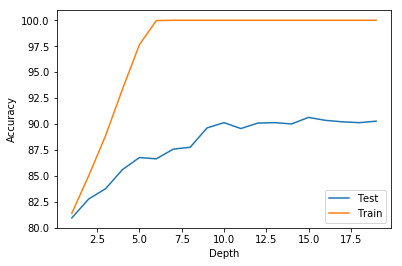

In [53]:
test_acc  = []
train_acc = []
depth = []
for i in range(1,20):
    dt = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=i) 
    clf_boost1 = AdaBoostClassifier(n_estimators=50, base_estimator=dt ,learning_rate=1)
    clf_boost1.fit(X_train,y_train)
    y_pred_boost = clf_boost1.predict(X_test)
    y_pred_boost_train = clf_boost1.predict(X_train)
    test_acc.append(accuracy_score(y_test,y_pred_boost)*100)
    train_acc.append(accuracy_score(y_train,y_pred_boost_train)*100)
    depth.append(i)
    
    
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.plot(depth,test_acc,label='Test')
plt.plot(depth,train_acc, label='Train')
plt.legend(loc='lower right')
plt.show()

In [75]:
#Decision Tree with best depth
clf_gini = dec_tree(X_train, y_train,12)
y_pred_tree = pred(X_test, clf_gini)
cal_accuracy(y_test, y_pred_tree)

Confusion Matrix:  [[ 598  449]
 [ 270 3617]]
Accuracy Score:  85.42764491284962
Classsification Report:                precision    recall  f1-score   support

        high       0.69      0.57      0.62      1047
         low       0.89      0.93      0.91      3887

    accuracy                           0.85      4934
   macro avg       0.79      0.75      0.77      4934
weighted avg       0.85      0.85      0.85      4934



In [76]:
dt_2 = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=12) 
clf_boost2 = AdaBoostClassifier(n_estimators=50, base_estimator=dt_2 ,learning_rate=1)
clf_boost2.fit(X_train,y_train)
y_pred_boost2 = clf_boost2.predict(X_test)
cal_accuracy(y_test, y_pred_boost2)

Confusion Matrix:  [[ 727  320]
 [ 196 3691]]
Accuracy Score:  89.54195379002837
Classsification Report:                precision    recall  f1-score   support

        high       0.79      0.69      0.74      1047
         low       0.92      0.95      0.93      3887

    accuracy                           0.90      4934
   macro avg       0.85      0.82      0.84      4934
weighted avg       0.89      0.90      0.89      4934



In [77]:
dt_3 = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=12) 
clf_boost3 = AdaBoostClassifier(n_estimators=100, base_estimator=dt_3 ,learning_rate=1)
clf_boost3.fit(X_train,y_train)
y_pred_boost3 = clf_boost3.predict(X_test)
cal_accuracy(y_test, y_pred_boost3)

Confusion Matrix:  [[ 743  304]
 [ 186 3701]]
Accuracy Score:  90.06890960680988
Classsification Report:                precision    recall  f1-score   support

        high       0.80      0.71      0.75      1047
         low       0.92      0.95      0.94      3887

    accuracy                           0.90      4934
   macro avg       0.86      0.83      0.84      4934
weighted avg       0.90      0.90      0.90      4934



In [78]:
#Applying K-fold cross validation with 10 splits for model trained with max_depth=12
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10)
score=cross_val_score(clf_boost3,X = X_train, y = y_train, cv=kfold)
print('Cross-validation score:{}\n'.format(score))
print('Average Cross-validation score:{}\n'.format(score.mean()))

Cross-validation score:[0.90141796 0.89662162 0.8972973  0.88783784 0.89662162 0.90337838
 0.91216216 0.91283784 0.88783784 0.89391892]

Average Cross-validation score:0.8989931474350786



# Model Comparison

In [79]:
accuracy=[accuracy_score(y_test,y_pred1),accuracy_score(y_test,y_pred2),accuracy_score(y_test,y_pred3),accuracy_score(y_test,pred_4),accuracy_score(y_test,y_pred_boost3)]
Functions=['SVM_Linear','SVM_rbf','SVM_Sigmoid','Decision_tree','Adaboost']

(0.7, 1.0)

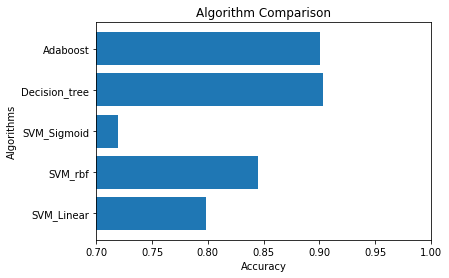

In [80]:
plt.barh(Functions,accuracy,alpha=1)
plt.xlabel("Accuracy")
plt.ylabel("Algorithms")
plt.title("Algorithm Comparison")
plt.xlim([0.7, 1.0])